Author: Akash Kharita </br>
Date: 02/28/2024



**This notebook tests various neural network architectures that are present in the Single Channel CNN Models scripts**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import obspy
from obspy.signal.filter import envelope
from obspy.clients.fdsn import Client
from tqdm import tqdm
from glob import glob
import tsfel
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

from sklearn.decomposition import PCA
import lightgbm as lgb
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

from scipy import stats
from scipy import signal
from sklearn.preprocessing import StandardScaler

from obspy.geodetics.base import gps2dist_azimuth

from datetime import timedelta
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset

from scipy.signal import resample
from zenodo_get import zenodo_get

## Importing all the models

In [2]:
import sys
sys.path.append('../Common_Scripts')


from Single_Channel_CNN_models import Archtime
from Single_Channel_CNN_models import Archtime_do
from Single_Channel_CNN_models import WaveDecompNet
from Single_Channel_CNN_models import WaveDecompNet_do
from Single_Channel_CNN_models import SeismicCNN_batch
from Single_Channel_CNN_models import SeismicCNN_batch_do
from Single_Channel_CNN_models import SeismicNet
from Single_Channel_CNN_models import SeismicNet_do


from neural_network_processing_functions import extract_datasets
from neural_network_processing_functions import train_model
from neural_network_processing_functions import plot_train_val_loss
from neural_network_processing_functions import plot_accuracy
from neural_network_processing_functions import extract_datasets_for_test
from neural_network_processing_functions import train_model_for_test
from neural_network_processing_functions import test_model

## Defining some common parameters for all models

In [3]:
number_epochs = 100
# Define the loss function (e.g., Cross-Entropy)
criterion = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training and Testing all the models

## Archtime (Original)

In [4]:
# Archtime_normal
num_channels = 1
number_features = 5000

#train_dataset, train_loader, test_dataset, test_loader, val_dataset, val_loader = extract_datasets(num_channels = 1, num_samples = 5000)
#train_dataset, train_loader, y_train, test_dataset, test_loader, y_test,  val_dataset, val_loader, y_val = extract_datasets(before = 1000, after = 40000, num_samples = 5000, batch_size = 32, num_channels = 1, train_size = 4000, test_size = 0, num_features = 5000, shifting = True)

train_dataset, train_loader, y_train, test_dataset, test_loader, y_test,  val_dataset, val_loader, y_val, event_ids_normal = extract_datasets(before = 1000, after = 4000, num_samples = 5500, batch_size = 32, num_channels = 1, train_size = 5000, test_size = 1, num_features = 5000, shifting = True, all_samples = False)


model_archtime = Archtime(num_channels = 1, num_features = 5000)
optimizer = torch.optim.Adam(model_archtime.parameters(), lr=0.001)
accuracy_archtime, train_loss_archtime, val_loss_archtime, y_pred, y_true  = train_model(model_archtime, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 5500/5500 [00:17<00:00, 321.96it/s]


(21952, 1, 5000)


  0%|          | 0/100 [00:00<?, ?it/s]/home/ak287/Data_Mining_in_the_PNW/Notebooks/../Common_Scripts/neural_network_processing_functions.py:573: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)
100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


## Archtime (with dropout)

In [5]:
# Archtime_dropout
num_channels = 1
number_features = 5000

#train_dataset, train_loader, test_dataset, test_loader, val_dataset, val_loader = extract_datasets(num_channels = 1, num_samples = 5000)
#train_dataset, train_loader, y_train, test_dataset, test_loader, y_test,  val_dataset, val_loader, y_val, event_ids_norma = extract_datasets(before = 1000, after = 4000, num_samples = 5500, batch_size = 32, num_channels = 1, train_size = 5000, test_size = 1, num_features = 5000, shifting = True, all_samples = False)


model_archtime_do = Archtime_do(num_channels = 1, num_features = 5000)
optimizer = torch.optim.Adam(model_archtime_do.parameters(), lr=0.001)
accuracy_archtime_do, train_loss_archtime_do, val_loss_archtime_do, y_pred, y_true  = train_model(model_archtime_do, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 100/100 [03:26<00:00,  2.07s/it]


## Wavedecompnet (original)

In [6]:
model_wavedecompnet = WaveDecompNet(num_channels = 1, num_features = 5000)
optimizer = torch.optim.Adam(model_wavedecompnet.parameters(), lr=0.001)
accuracy_wavedecompnet, train_loss_wavedecompnet, val_loss_wavedecompnet, y_pred, y_true  = train_model(model_wavedecompnet, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 100/100 [04:34<00:00,  2.74s/it]


## WaveDecompNet (with dropout)

In [7]:
model_wavedecompnet_do = WaveDecompNet_do(num_channels = 1, num_features = 5000)
optimizer = torch.optim.Adam(model_wavedecompnet_do.parameters(), lr=0.001)
accuracy_wavedecompnet_do, train_loss_wavedecompnet_do, val_loss_wavedecompnet_do, y_pred, y_true  = train_model(model_wavedecompnet_do, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 100/100 [04:57<00:00,  2.98s/it]


## SeismicCNN_batch (original)

In [8]:
model_seismiccnn_batch = SeismicCNN_batch(num_channels = 1)
optimizer = torch.optim.Adam(model_seismiccnn_batch.parameters(), lr=0.001)
accuracy_seismiccnn_batch, train_loss_seismiccnn_batch, val_loss_seismiccnn_batch, y_pred, y_true  = train_model(model_seismiccnn_batch, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 100/100 [04:24<00:00,  2.65s/it]


## SeismicCNN_batch (with dropout)

In [9]:
model_seismiccnn_batch_do = SeismicCNN_batch_do(num_channels = 1)
optimizer = torch.optim.Adam(model_seismiccnn_batch_do.parameters(), lr=0.001)
accuracy_seismiccnn_batch_do, train_loss_seismiccnn_batch_do, val_loss_seismiccnn_batch_do, y_pred, y_true  = train_model(model_seismiccnn_batch_do, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 5000)


100%|██████████| 100/100 [04:30<00:00,  2.71s/it]


## SeismicNet (original)

In [11]:
# Seismicne dropout
num_channels = 1
number_features = 15000

#train_dataset, train_loader, test_dataset, test_loader, val_dataset, val_loader = extract_datasets(num_channels = 1, num_samples = 5000)

train_dataset, train_loader, y_train, test_dataset, test_loader, y_test,  val_dataset, val_loader, y_val, event_ids_seismicnet = extract_datasets(before = 5000, after = 10000, num_samples = 5000, batch_size = 32, num_channels = 1, train_size = 4000, test_size = 1, num_features = 15000, shifting = False, all_samples = False)
model_seismicnet = SeismicNet(num_channels = 1, num_features = 15000)
optimizer = torch.optim.Adam(model_seismicnet.parameters(), lr=0.001)
accuracy_seismicnet, train_loss_seismicnet, val_loss_seismicnet, y_pred, y_true  = train_model(model_seismicnet, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 15000)


100%|██████████| 5000/5000 [00:18<00:00, 272.06it/s]


(19960, 1, 15000)


100%|██████████| 100/100 [07:05<00:00,  4.25s/it]


## SeismicNet (with dropout)

In [12]:
# A dataset will contain the features and corresponding labels. 
# We can access the elements in the dataset by specifying the index. 
# A dataloader - split the whole datasets into batches of specified sizes and shuffle randomly.


model_seismicnet_do = SeismicNet_do(num_channels = 1, num_features = 15000)
optimizer = torch.optim.Adam(model_seismicnet_do.parameters(), lr=0.001)
accuracy_seismicnet_do, train_loss_seismicnet_do, val_loss_seismicnet_do, y_pred, y_true  = train_model(model_seismicnet_do, train_loader, val_dataset, val_loader, optimizer, n_epochs = number_epochs, num_channels = num_channels, num_features = 15000)


100%|██████████| 100/100 [07:05<00:00,  4.26s/it]


## Plotting the performance of individual models

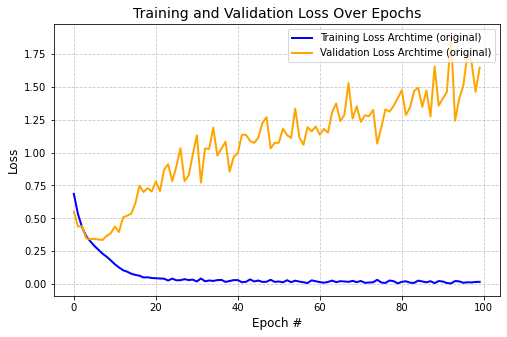

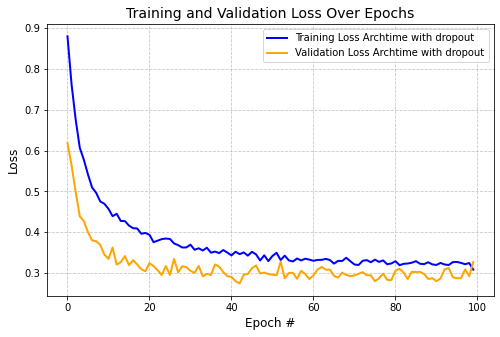

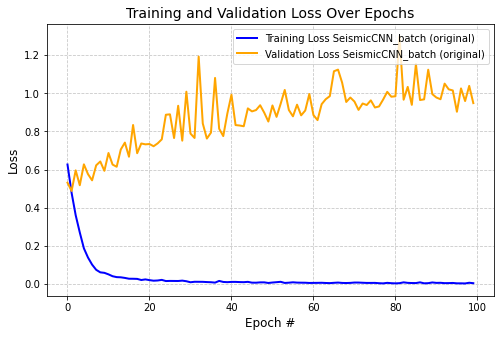

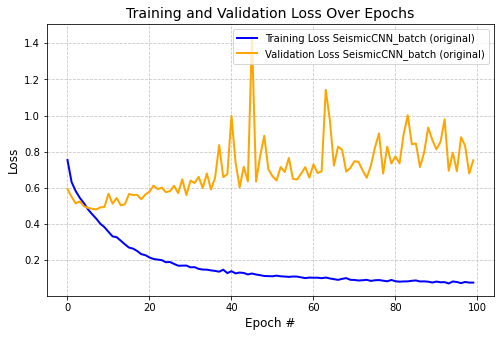

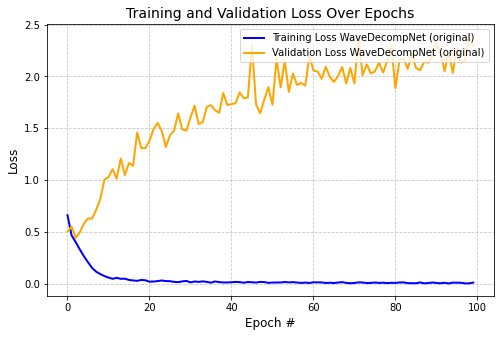

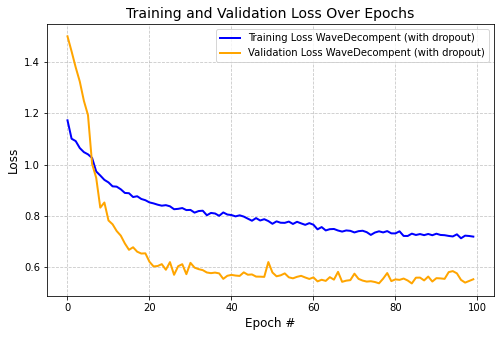

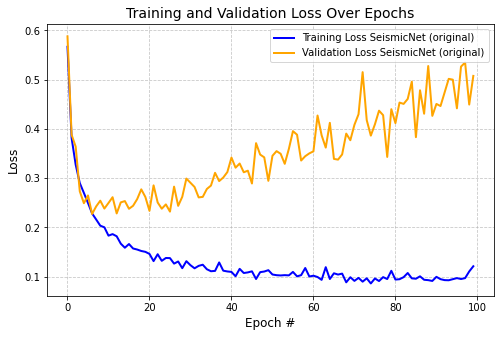

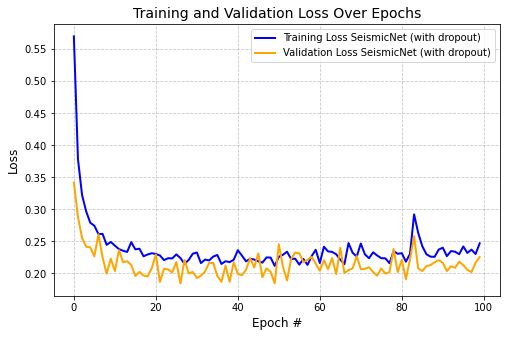

In [13]:
## Archtime models
plot_train_val_loss(train_loss_archtime, val_loss_archtime, title = 'Archtime (original)')
plot_train_val_loss(train_loss_archtime_do, val_loss_archtime_do, title = 'Archtime with dropout')


# SeismicCNN_batch
plot_train_val_loss(train_loss_seismiccnn_batch, val_loss_seismiccnn_batch, title = 'SeismicCNN_batch (original)')
plot_train_val_loss(train_loss_seismiccnn_batch_do, val_loss_seismiccnn_batch_do, title = 'SeismicCNN_batch (original)')


# WaveDecompNet
plot_train_val_loss(train_loss_wavedecompnet, val_loss_wavedecompnet, title = 'WaveDecompNet (original)')
plot_train_val_loss(train_loss_wavedecompnet_do, val_loss_wavedecompnet_do, title = 'WaveDecompent (with dropout)')


# SeismicNet
plot_train_val_loss(train_loss_seismicnet, val_loss_seismicnet, title = 'SeismicNet (original)')
plot_train_val_loss(train_loss_seismicnet_do, val_loss_seismicnet_do, title = 'SeismicNet (with dropout)')

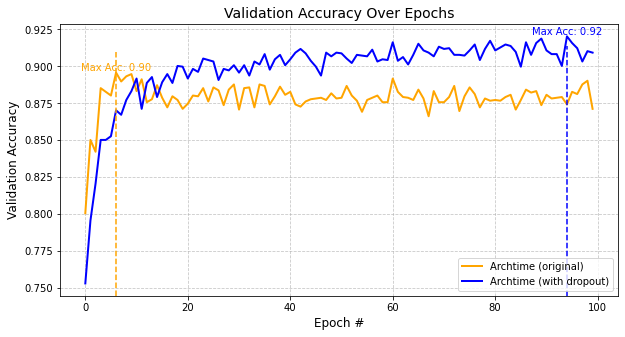

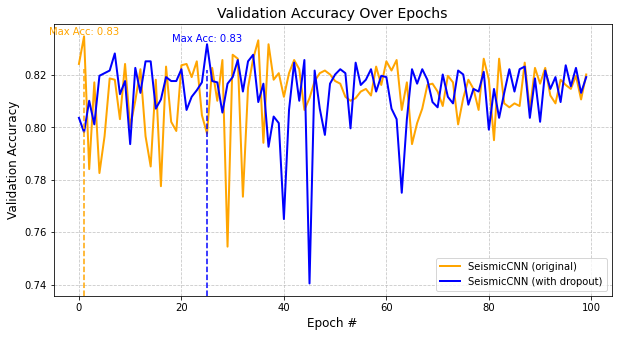

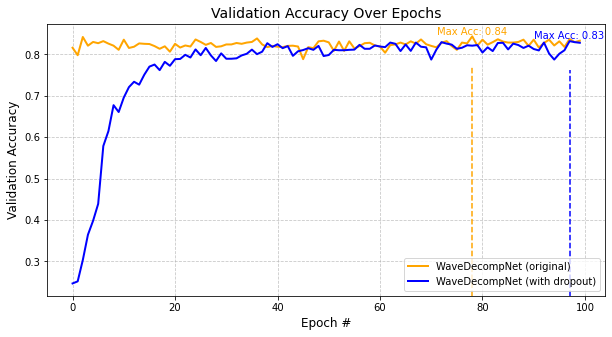

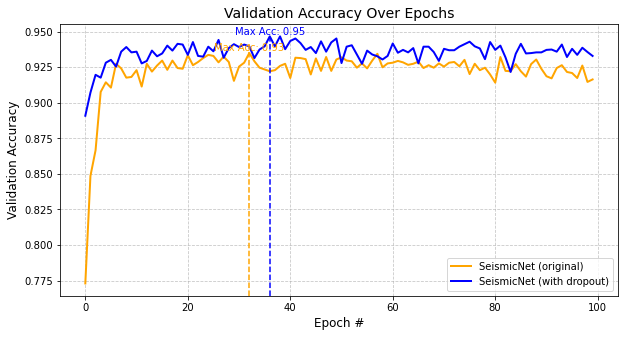

In [14]:
plot_accuracy(accuracy_archtime, accuracy_archtime_do, label1 = 'Archtime (original)', label2 = 'Archtime (with dropout)')

plot_accuracy(accuracy_seismiccnn_batch, accuracy_seismiccnn_batch_do, label1 = 'SeismicCNN (original)', label2 = 'SeismicCNN (with dropout)')


plot_accuracy(accuracy_wavedecompnet, accuracy_wavedecompnet_do, label1 = 'WaveDecompNet (original)', label2 = 'WaveDecompNet (with dropout)')


plot_accuracy(accuracy_seismicnet, accuracy_seismicnet_do, label1 = 'SeismicNet (original)', label2 = 'SeismicNet (with dropout)')












